In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_lfw_people

In [3]:
# load dataset
faces = fetch_lfw_people(min_faces_per_person=60)

In [5]:
faces.target_names

array(['Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Junichiro Koizumi'], dtype='<U17')

In [6]:
faces.images.shape

(820, 62, 47)

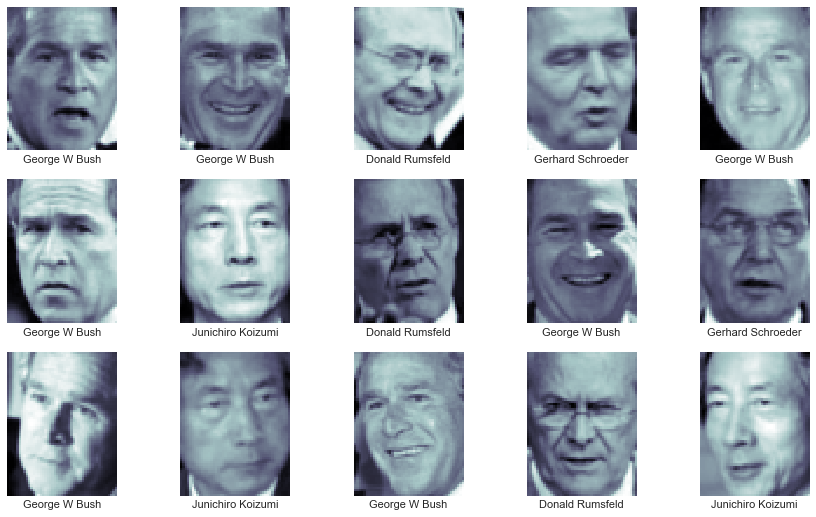

In [16]:
# plot the faces
fig, ax = plt.subplots(3, 5, figsize=(15,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [17]:
# 使用PCA取出圖片(較有意義的)特徵，該特徵能代表全部的像素。否則圖片像素是62*47維度高達3000多，導致計算時間提高，以及過度擬合的問題
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

In [18]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc_clf = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc_clf)

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

In [20]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [28]:
param_grid = {'svc__C':[1,5,10,50],
             'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}

In [29]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [30]:
%time grid.fit(X_train, y_train)

Wall time: 9.19 s


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('randomizedpca', RandomizedPCA(copy=True, iterated_power=2, n_components=150, random_state=42,
       whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [32]:
# SVC best parameters
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [33]:
# make prediction
model = grid.best_estimator_
y_pred = model.predict(X_test)

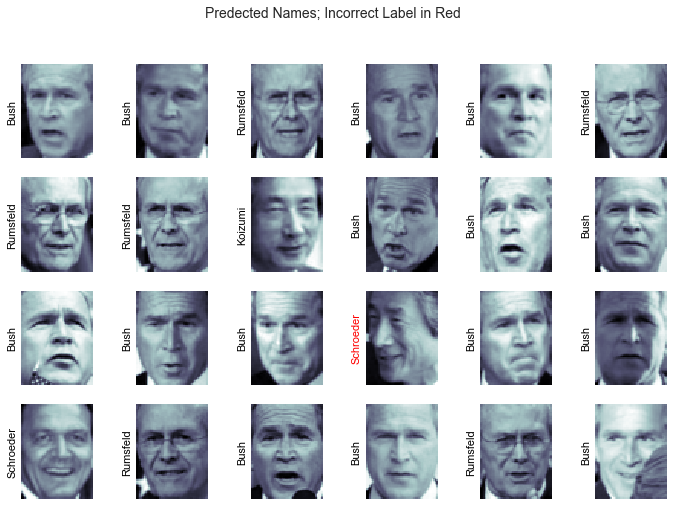

In [41]:
fig, ax = plt.subplots(4, 6, figsize=(12,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                  color='black' if y_pred[i] == y_test[i] else 'red')
    fig.suptitle('Predected Names; Incorrect Label in Red', size=14)